# Housing Market Regression Project

This project is a simple Kaggle regression problem. Being a regression problem, we are trying to predict a real number, in this case a price, for a house based on various features such as sqft, number of rooms, lot size, etc. Lets get started.

In [57]:
import time
import decimal
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [23]:
training_data = pd.read_csv(r"C:\Users\mbowling\Matthew Bowling Personal Dev\MachineLearning\Housing Market\train.csv")

In [24]:
training_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

In [25]:
for col in training_data.columns:
    print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


As we can see, we don't have a ton of data, however we do have 81 columns. This means, tenatively, we are looking at 81 features. For this amount of data, we do not need that many features to describe it. To help refine these features, we will do a few things. One, we will drop columns who have a majority of empty values. We cannot expect to know what these columns should have had for values, so we might as well get rid of them. We will also look for any highly correlated columns to the sale price. Meaning, we will see what columns most highly relate to the final sale price, to help thin our the margins a little. We will also see if we can consolidate some columns into one all inclusive feature which better depicts a correlation to our sale price. Lets take a look.

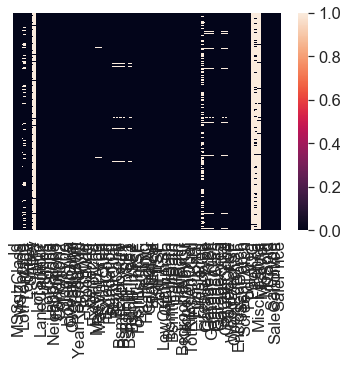

In [26]:
sns.heatmap(training_data.isnull(), yticklabels=False, xticklabels=True)

There are a bit too many columns to accurately see how many null values are where, but we DO have some columns we need to drop, so lets print these values out.

In [27]:
training_data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

we know we have 1460 instances of data. So looking at our data, we have a few candidates to be removed. Since we have so many features as is, we will remove the top offenders of null data being: Alley, FireplaceQu, PoolQC, Fence, and MiscFeature.

In [28]:
training_data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
training_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

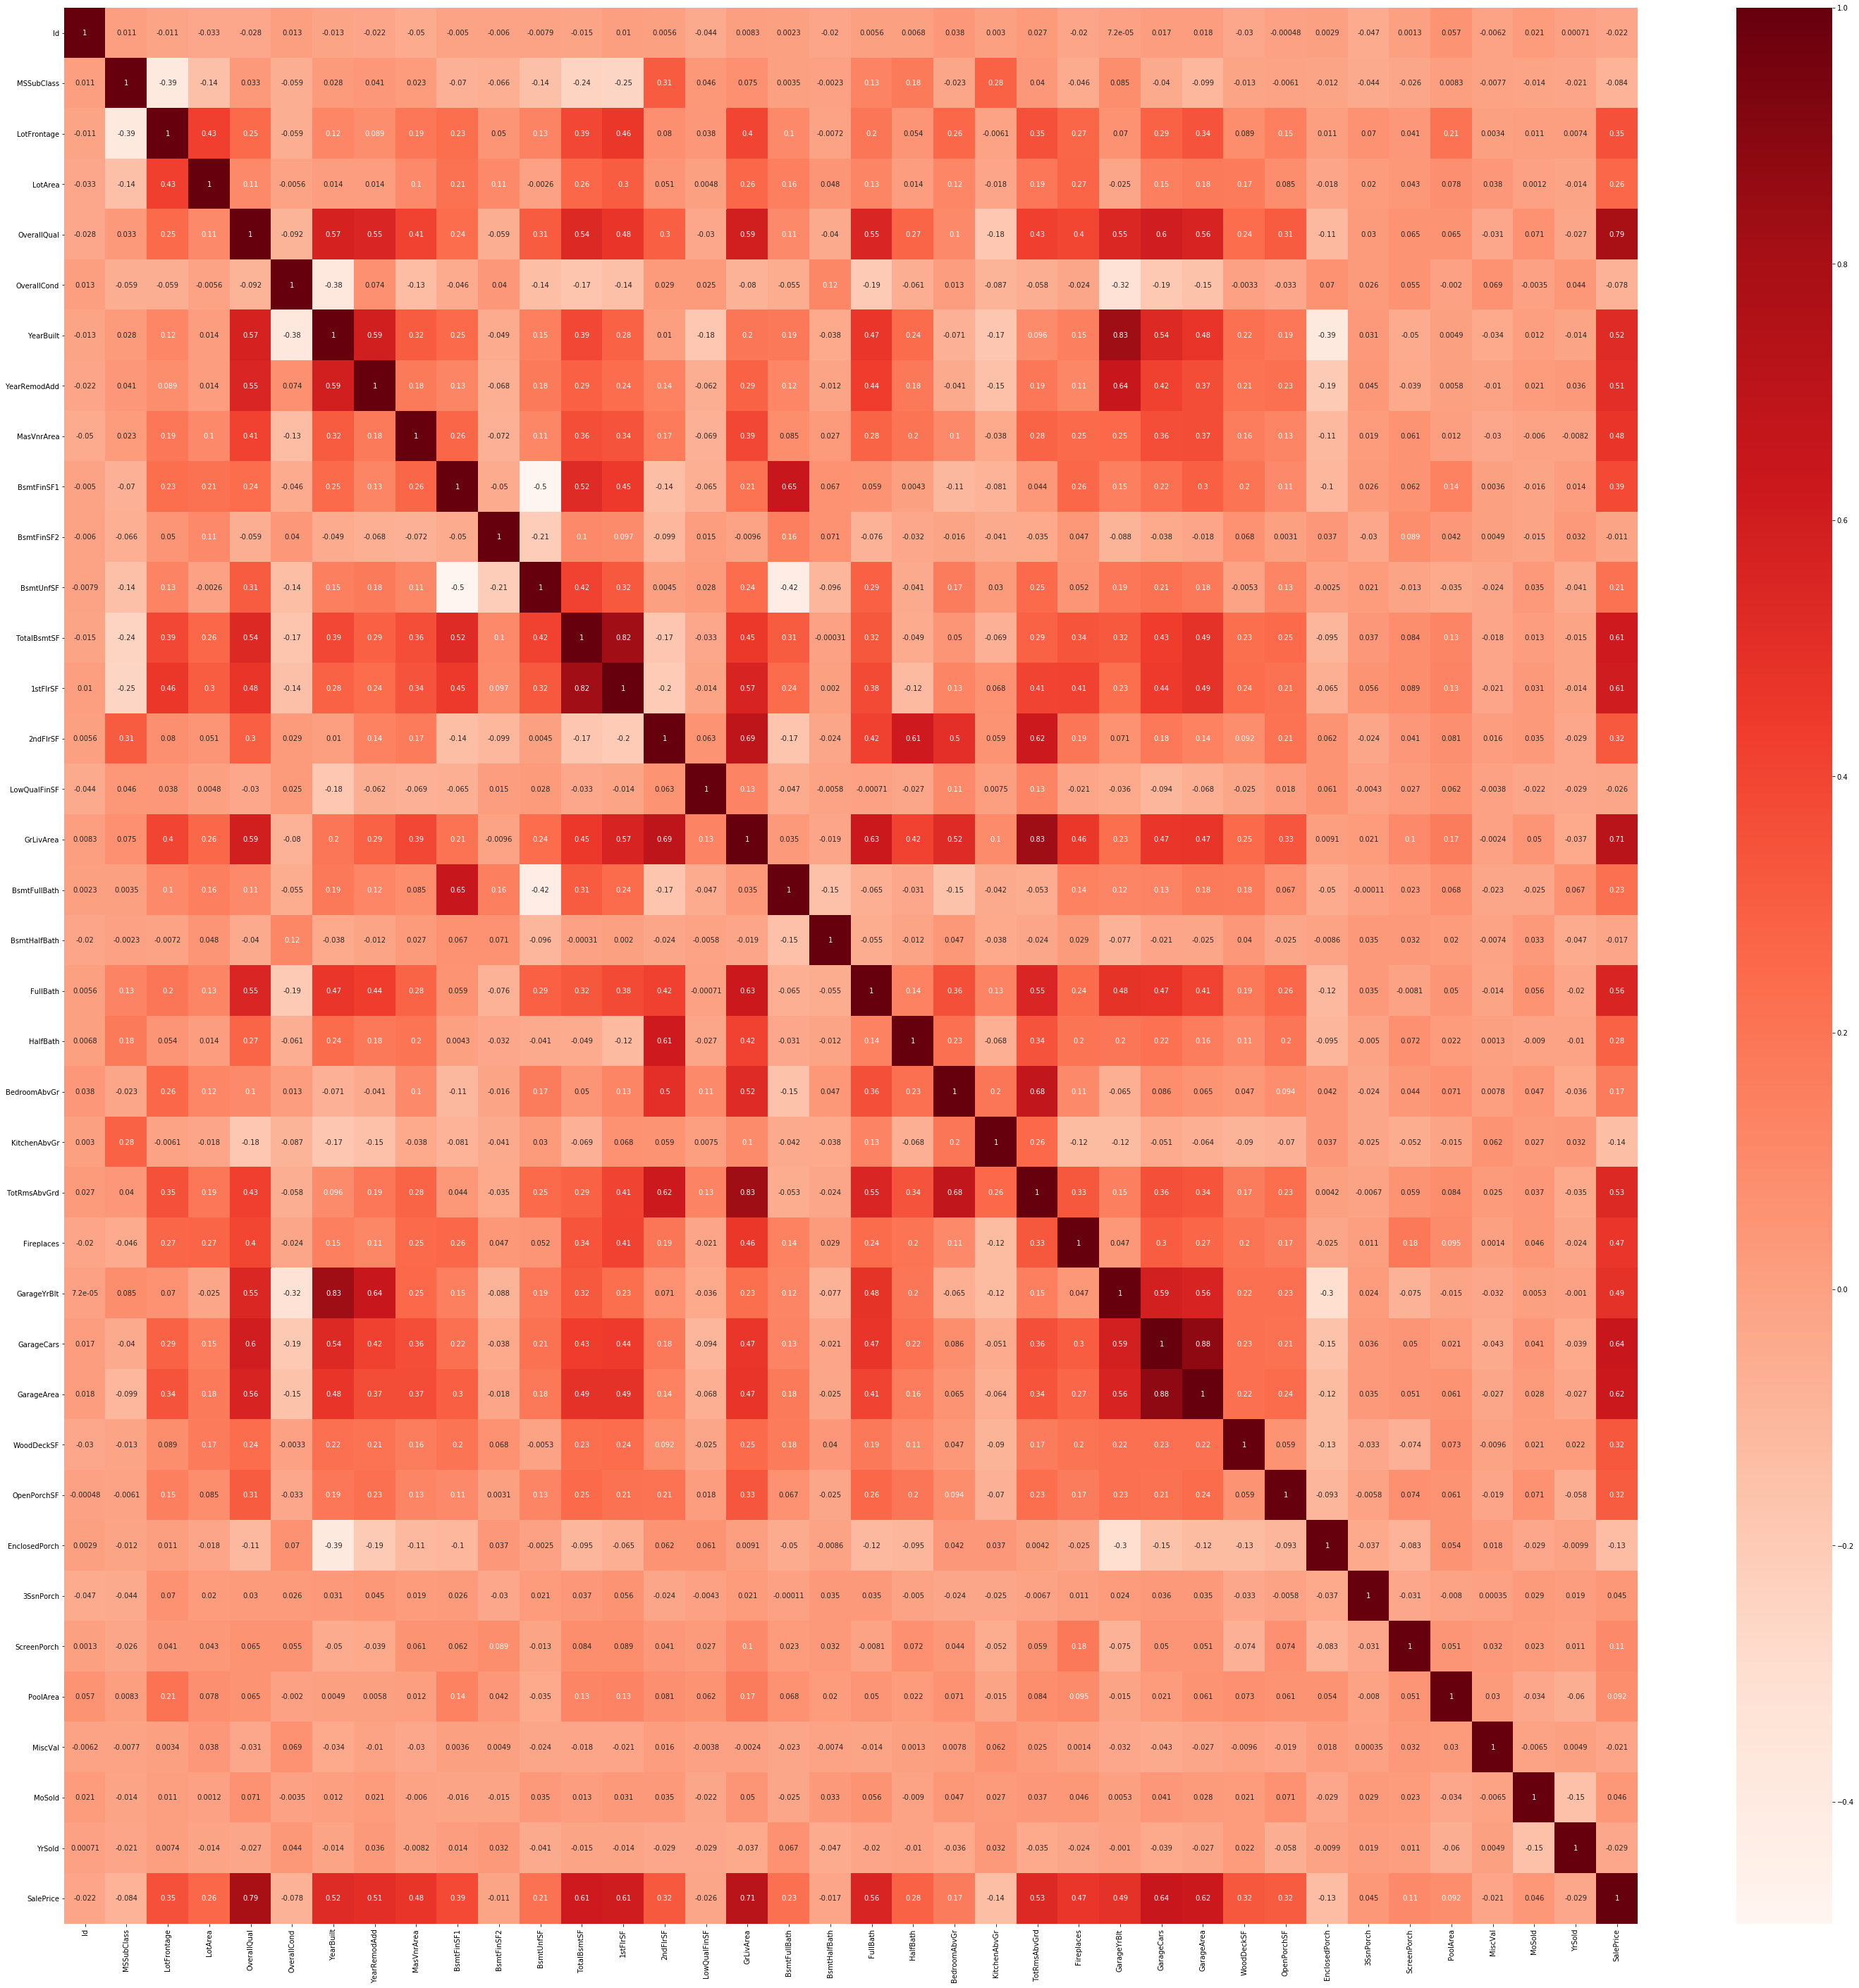

In [9]:
plt.figure(figsize=(50,50))
cor = training_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

There are a lot of correlations here but it shows a couple things. Number one, it shows a ton of features aren't highly correlated to anything. Number two, it shows some of the most correlated features to what we wish to predict: sales price. Since a majority of these pieces of information do not indicate anything towards sales price, lets select the top 15 or so.

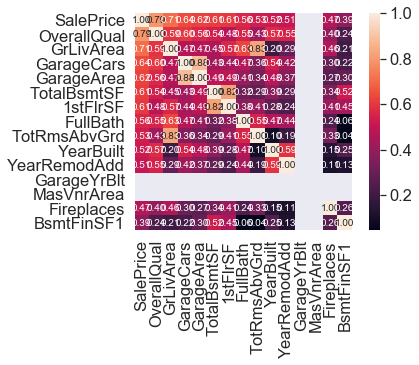

In [10]:
feature_numbers = 15
columns = training_data.corr().nlargest(feature_numbers, 'SalePrice')['SalePrice'].index
correlation_matrix = np.corrcoef(training_data[columns].values.T)
sns.set(font_scale=1.50)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},yticklabels=columns.values, xticklabels=columns.values)
plt.show()

There are some issues with GarageYrBlt and MasVnrArea but this is because they have null data which is messing with our correlation, so lets refine this matrix and do the top 10 since not only are we missing values but there is a drop off in correlation as well.

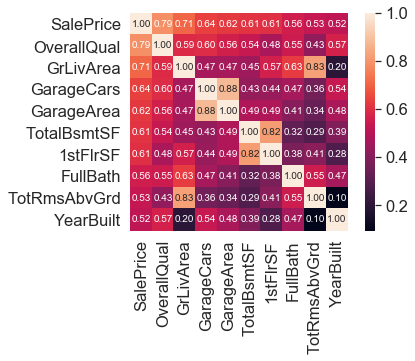

In [11]:
feature_numbers = 10
columns = training_data.corr().nlargest(feature_numbers, 'SalePrice')['SalePrice'].index
correlation_matrix = np.corrcoef(training_data[columns].values.T)
sns.set(font_scale=1.50)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},yticklabels=columns.values, xticklabels=columns.values)
plt.show()

so here our correlation is atleast > .5 with some being highly correlated. We can also take these and even acknowledge additional correlations. For example, our TotalBasement Square Footage is highly correlated to the first floor square footage. Or garage cars correlates highly to garage area. Both of these make sense because you typically have a basement that is no larger than your first floor, and the size of your garage dictates how many vehicles fit in it. These will most likely end up the features we want to maintain and move forward with, but lets do a couple more bits of analysis before we say for certain.

In [12]:
scaler = StandardScaler().fit_transform(training_data['SalePrice'][:,np.newaxis])
lowest_outliers = scaler[scaler[:, 0].argsort()][:10]
highest_outliers = scaler[scaler[:, 0].argsort()][-10:]
print(lowest_outliers)
print('=====================')
print(highest_outliers)

[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


We can see the lower outliers are pretty close to 0. the higher outliers are much more dramatic and can potentially skew our model. The two 7 values and potentially the three 5s could cause some problems down the road. Lets Visualize the columns we have against sale price and see what we can learn

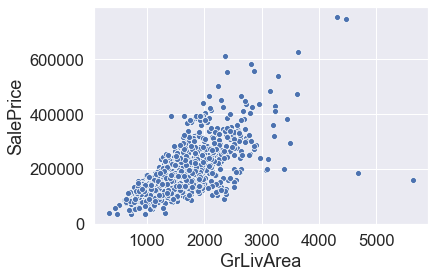

In [14]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=training_data)

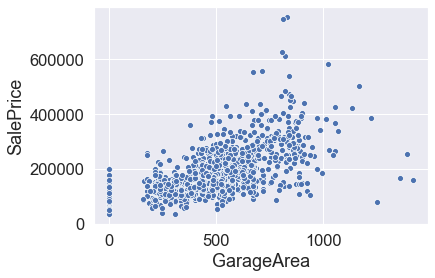

In [15]:
sns.scatterplot(x='GarageArea',y='SalePrice',data=training_data)

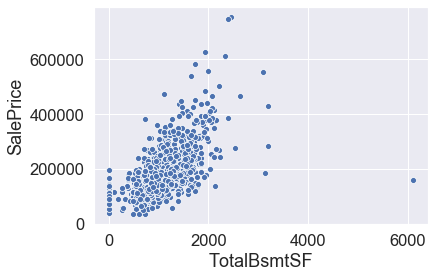

In [17]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=training_data)

Already we see a very linear correlation to some of our features, meaning our initial suspecions were correct. We can also see a couple outliers as well. It would be best to get rid of those outliers just to ensure the accuracy of our model.

In [19]:
training_data_copy = training_data.sort_values(by = 'GrLivArea', ascending = False)[:5]
training_data_copy

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1298  1299          60       RL        313.0    63887   Pave      IR3   
523    524          60       RL        130.0    40094   Pave      IR1   
1182  1183          60       RL        160.0    15623   Pave      IR1   
691    692          60       RL        104.0    21535   Pave      IR1   
1169  1170          60       RL        118.0    35760   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1169         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1298       Norm     1Fam     2Story           10            5       2008   
523        PosN     1Fam     2Story           10            5       2007   
1182       Norm     1Fam     2Story           10            5       1996   
691        Norm     1Fam     2Story           10            6       1994   
1169       Norm     1Fam     2Story           10            5       1995   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
691           1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   
1169          1996       Hip  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1298       796.0        Ex        TA      PConc       Ex       TA   
523        762.0        Ex        TA      PConc       Ex       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   
691       1170.0        Ex        TA      PConc       Ex       TA   
1169      1378.0        Gd        Gd      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1298           Gd          GLQ        5644          Unf           0   
523            Gd          GLQ        2260          Unf           0   
1182           Av          GLQ        2096          Unf           0   
691            Gd          GLQ        1455          Unf           0   
1169           Gd          GLQ        1387          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1298        466         6110    GasA        Ex          Y      SBrkr   
523         878         3138    GasA        Ex          Y      SBrkr   
1182        300         2396    GasA        Ex          Y      SBrkr   
691         989         2444    GasA        Ex          Y      SBrkr   
1169        543         1930    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1298      4692       950             0       5642             2             0   
523       3138      1538             0       4676             1             0   
1182      2411      2065             0       4476             1             0   
691       2444      1872             0       4316             0             1   
1169      1831      1796             0       3627             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1298         2         1             3             1          Ex   
523          3         1             3             1          Ex   
1182         3         1             4             1          Ex   
691          3         1             4             1          Ex   
1169         3         1             4             1          Gd   

      TotRmsAbvGrd Functional  Fireplac

In [20]:
training_data = training_data.drop(training_data[training_data['Id'] == 1299].index)
training_data = training_data.drop(training_data[training_data['Id'] == 524].index)
training_data = training_data.drop(training_data[training_data['Id'] == 1183].index)
training_data = training_data.drop(training_data[training_data['Id'] == 692].index)
training_data = training_data.drop(training_data[training_data['Id'] == 1170].index)
training_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

We refined our feature list to a much smaller amount, and removed a few problematic outliers. Lets go ahead and make our final training data batch, load our testing data, and begin the Machine Learning process.

In [29]:
training_data = training_data[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd', 'YearBuilt', 'SalePrice']]
training_data.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7       1710           2         548          856       856   
1            6       1262           2         460         1262      1262   
2            7       1786           2         608          920       920   
3            7       1717           3         642          756       961   
4            8       2198           3         836         1145      1145   

   FullBath  TotRmsAbvGrd  YearBuilt  SalePrice  
0         2             8       2003     208500  
1         2             6       1976     181500  
2         2             6       2001     223500  
3         1             7       1915     140000  
4         2             9       2000     250000

In [37]:
training_data.isna().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
SalePrice       0
dtype: int64

In [65]:
test_data = pd.read_csv(r"C:\Users\mbowling\Matthew Bowling Personal Dev\MachineLearning\Housing Market\test.csv")
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [66]:
test_data_ids = test_data[['Id']]

In [67]:
test_data = test_data[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd', 'YearBuilt']]
test_data.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            5        896         1.0       730.0        882.0       896   
1            6       1329         1.0       312.0       1329.0      1329   
2            5       1629         2.0       482.0        928.0       928   
3            6       1604         2.0       470.0        926.0       926   
4            8       1280         2.0       506.0       1280.0      1280   

   FullBath  TotRmsAbvGrd  YearBuilt  
0         1             5       1961  
1         1             6       1958  
2         2             6       1997  
3         2             7       1998  
4         2             5       1992

In [68]:
test_data.isna().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [69]:
test_data.TotalBsmtSF.fillna(test_data.TotalBsmtSF.mean(), inplace=True)
test_data.GarageArea.fillna(test_data.GarageArea.mean(), inplace=True)
test_data.GarageCars.fillna(test_data.GarageCars.mean(), inplace=True)

In [70]:
test_data.isna().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [38]:
training_data_label = training_data[['SalePrice']]
training_data_label = np.ravel(training_data_label)
training_data = training_data.drop('SalePrice', axis=1)

For this project, we will be going with some standard regression models to try our luck at. We will go with a standard linear regression model, Support Vector Machines, and Random Forest.

In [40]:
training_data.reset_index()

train_set_data, temp_set_data, train_set_label, temp_set_label = train_test_split(training_data, training_data_label, test_size=0.3, random_state = 40)
validation_set_data, test_set_data, validation_set_label, test_set_label = train_test_split(temp_set_data, temp_set_label, test_size=0.5, random_state = 40)

In [41]:
linear_clf = LinearRegression()
linear_clf = linear_clf.fit(train_set_data, train_set_label)
print(linear_clf.score(validation_set_data, validation_set_label))

0.8537132031148842


In [47]:
svm_clf = LinearSVR(max_iter=100000)
svm_clf = svm_clf.fit(train_set_data, train_set_label)
print(svm_clf.score(validation_set_data, validation_set_label))

0.7643888814551189


In [42]:
random_forest_clf = RandomForestRegressor()
random_forest_clf.fit(train_set_data, train_set_label)
print(random_forest_clf.score(validation_set_data, validation_set_label))

0.859728815112362


Our top two performing regression algorithms are linear regression and Random Forest Regressor. So we will use GridSearch to find the optimal hyperparameters for these two models and see if we can't find the most accurate model to use in predicting sale price. Note we will try two different Linear Regression algorithms for both regression problems: Lasso and Ridge.

In [60]:
alpha = list(np.arange(0,2, 0.5))
fit_intercept = [True, False]
normalize = [True, False]
max_iter = list(range(0, 100000,10000))
tol = list(np.arange(0,.1,.05))
param_grid = dict(alpha=alpha, fit_intercept=fit_intercept, normalize=normalize, max_iter=max_iter, tol=tol)

grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv = 5, n_jobs=-1)

start_time = time.time()
grid_result = grid_search.fit(train_set_data, train_set_label)
grid_validation = grid_search.score(validation_set_data, validation_set_label)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Validation Set Prediction:", grid_validation)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.725488 using {'alpha': 1.5, 'fit_intercept': True, 'max_iter': 10000, 'normalize': True, 'tol': 0.05}
Validation Set Prediction: 0.8543222467445211
Execution time: 167.44655680656433 ms


In [63]:
n_estimators = list(np.arange(1,101, 10))
criterion = ['mse','mae']
max_depth = list(range(2,102,10))
param_grid = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv = 5, n_jobs=-1)

start_time = time.time()
grid_result = grid_search.fit(train_set_data, train_set_label)
grid_validation = grid_search.score(validation_set_data, validation_set_label)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Validation Set Prediction:", grid_validation)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.829349 using {'criterion': 'mse', 'max_depth': 22, 'n_estimators': 81}
Validation Set Prediction: 0.8687170349590863
Execution time: 386.04752492904663 ms


In [73]:
svm_clf = LinearSVR(max_iter=100000)
svm_clf = svm_clf.fit(train_set_data, train_set_label)

prices = svm_clf.predict(test_data)
test_df = pd.DataFrame(test_data_ids, columns=['Id'])
test_df['SalePrice'] = prices
test_df.head()

Id  SalePrice
0  1461  125368.74
1  1462  150428.50
2  1463  169075.00
3  1464  184056.00
4  1465  225320.12

In [74]:
test_df.to_csv('submission.csv', sep=',', encoding='utf-8')